In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import plotly.express as px

In [17]:
pd.set_option('display.max_columns', 60)

In [18]:
sns.set_style('dark')

In [19]:
df=pd.read_csv("/content/cars_ds_final.csv")
df.head(20)

,Unnamed: 0,Make,Model,Variant,Ex-Showroom_Price,Displacement,Cylinders,Valves_Per_Cylinder,Drivetrain,Cylinder_Configuration,Emission_Norm,Engine_Location,Fuel_System,Fuel_Tank_Capacity,Fuel_Type,Height,Length,Width,Body_Type,Doors,City_Mileage,Highway_Mileage,ARAI_Certified_Mileage,ARAI_Certified_Mileage_for_CNG,Kerb_Weight,Gears,Ground_Clearance,Front_Brakes,Rear_Brakes,Front_Suspension,...,Apple_CarPlay,Cigarette_Lighter,Infotainment_Screen,Multifunction_Steering_Wheel,Average_Speed,EBA_(Electronic_Brake_Assist),Seat_Height_Adjustment,Navigation_System,Second_Row_AC_Vents,Tyre_Pressure_Monitoring_System,Rear_Center_Armrest,iPod_Compatibility,ESP_(Electronic_Stability_Program),Cooled_Glove_Box,Recommended_Tyre_Pressure,Heated_Seats,Turbocharger,ISOFIX_(Child-Seat_Mount),Rain_Sensing_Wipers,Paddle_Shifters,Leather_Wrapped_Steering,Automatic_Headlamps,Engine_Type,ASR_/_Traction_Control,Cruise_Control,USB_Ports,Heads-Up_Display,Welcome_Lights,Battery,Electric_Range
0,0,Tata,Nano Genx,Xt,"Rs. 2,92,667",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,BS IV,"Rear, Transverse",Injection,24 litres,Petrol,1652 mm,3164 mm,1750 mm,Hatchback,5.0,?23.6 km/litre,NaN,23.6 km/litre,NaN,660 kg,4,180 mm,Drum,Drum,"Independent, Lower Wishbone, McPherson Strut w...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Tata,Nano Genx,Xe,"Rs. 2,36,447",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,BS IV,"Rear, Transverse",Injection,24 litres,Petrol,1652 mm,3164 mm,1750 mm,Hatchback,5.0,?23.6 km/litre,NaN,23.6 km/litre,NaN,725 kg,4,180 mm,Drum,Drum,"Independent, Lower Wishbone, McPherson Strut w...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Tata,Nano Genx,Emax Xm,"Rs. 2,96,661",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,BS IV,"Rear, Transverse",Injection,15 litres,CNG,1652 mm,3164 mm,1750 mm,Hatchback,4.0,NaN,NaN,NaN,36 km/kg,710 kg,4,180 mm,Drum,Drum,"Independent, Lower Wishbone, McPherson Strut w...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Tata,Nano Genx,Xta,"Rs. 3,34,768",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,BS IV,"Rear, Transverse",Injection,24 litres,Petrol,1652 mm,3164 mm,1750 mm,Hatchback,5.0,?23.6 km/litre,NaN,21.9 km/litre,NaN,725 kg,5,180 mm,Drum,Drum,"Independent, Lower Wishbone, McPherson Strut w...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Tata,Nano Genx,Xm,"Rs. 2,72,223",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,BS IV,"Rear, Transverse",Injection,24 litres,Petrol,1652 mm,3164 mm,1750 mm,Hatchback,5.0,?23.6 km/litre,NaN,23.6 km/litre,NaN,725 kg,4,180 mm,Drum,Drum,"Independent, Lower Wishbone, McPherson Strut w...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5,Tata,Nano Genx,Xma,"Rs. 3,14,815",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,BS IV,"Rear, Transverse",Injection,24 litres,Petrol,1652 mm,3164 mm,1750 mm,Hatchback,5.0,?23.6 km/litre,NaN,21.9 km/litre,NaN,710 kg,5,180 mm,Drum,Drum,"Independent, Lower Wishbone, McPherson Strut w...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,6,Datsun,Redi-Go,D,"Rs. 2,79,650",799 cc,3.0,4.0,FWD (Front Wheel Drive),In-line,BS IV,"Front, Transverse",Injection,28 litres,Petrol,1541 mm,3429 mm,1560 mm,Hatchback,5.0,21.38 km/litre,24 km/litre,25.17 km/litre,NaN,NaN,5,185 mm,Ventilated Disc,Drum,Double Pivot Arm,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,7,Datsun,Redi-Go,T,"Rs. 3,51,832",799 cc,3.0,4.0,FWD (Front Wheel Drive),In-line,BS IV,"Front, Transverse",Injection,28 litres,Petrol,1541 mm,3429 mm,1560 mm,Hatch

In [20]:
df.shape

(1276, 141)

In [21]:
s1 = len(df)
s2 = len(df.Model.unique())
s3 = len(df.Make.unique())
s4 = len(df.columns)

fig = px.bar(x=['Observations', 'Features','Makers', 'Models'],
             y=[s1, s2, s3, s4],
             width=900, height=500)

fig.update_layout(
    title="Data Statistics",
    xaxis_title="",
    yaxis_title="Count",
    font=dict(
        size=14,
    )
)

colors = ['coral', 'yellowgreen', 'teal', 'violet']
fig.update_traces(marker_color=colors)

fig.show()

In [22]:
df['car'] = df.Make + ' ' + df.Model
c = ['Make','Model','car','Variant','Body_Type','Fuel_Type','Fuel_System','Type','Drivetrain','Ex-Showroom_Price','Displacement','Cylinders',
     'ARAI_Certified_Mileage','Power','Torque','Fuel_Tank_Capacity','Height','Length','Width','Doors','Seating_Capacity','Wheelbase','Number_of_Airbags']

In [23]:
df_full = df.copy()
df['Ex-Showroom_Price'] = df['Ex-Showroom_Price'].str.replace('Rs. ','',regex=False)
df['Ex-Showroom_Price'] = df['Ex-Showroom_Price'].str.replace(',','',regex=False)
df['Ex-Showroom_Price'] = df['Ex-Showroom_Price'].astype(int)

In [24]:
df = df[c]

In [25]:
df = df[~df.Wheelbase.isnull()]
df = df[~df.Width.isnull()]
df = df[~df.ARAI_Certified_Mileage.isnull()]
df = df[~df.Cylinders.isnull()]
df = df[~df['Seating_Capacity'].isnull()]
df = df[~df.Make.isnull()]
df = df[~df['Fuel_Tank_Capacity'].isnull()]
df = df[~df['Torque'].isnull()]

In [26]:
df['Length'] = df['Length'].str.replace(' mm','',regex=False).astype(float)
df['Width'] = df['Width'].str.replace(' mm','',regex=False).astype(float)
df['Height'] = df['Height'].str.replace(' mm','',regex=False).astype(float)
df['Wheelbase'] = df['Wheelbase'].str.replace(' mm','',regex=False).astype(float)
df['Fuel_Tank_Capacity'] = df['Fuel_Tank_Capacity'].str.replace(' litres','',regex=False).astype(float)
df['Displacement'] = df['Displacement'].str.replace(' cc','',regex=False)

In [27]:
df.loc[df.ARAI_Certified_Mileage == '9.8-10.0 km/litre','ARAI_Certified_Mileage'] = '10'
df.loc[df.ARAI_Certified_Mileage == '10kmpl km/litre','ARAI_Certified_Mileage'] = '10'
df['ARAI_Certified_Mileage'] = df['ARAI_Certified_Mileage'].str.replace(' km/litre','',regex=False).astype(float)

In [28]:
df.Number_of_Airbags.fillna(0,inplace= True)
df['price'] = df['Ex-Showroom_Price'] * 0.014
df.drop(columns='Ex-Showroom_Price', inplace= True)
df.price = df.price.astype(int)

In [29]:
hp = df.Power.str.extract(r'(\d{1,4}).*').astype(int) * 0.98632
hp = hp.apply(lambda x: round(x,2))
tq = df.Torque.str.extract(r'(\d{1,4}).*').astype(int)
tq = tq.apply(lambda x: round(x,2))
df.Torque = tq
df.Power = hp

In [30]:
df.Doors = df.Doors.astype(int)
df.Displacement = df.Displacement.astype(int)
df.Seating_Capacity = df.Seating_Capacity.astype(int)
df.Cylinders = df.Cylinders.astype(int)
df.Number_of_Airbags = df.Number_of_Airbags.astype(int)

In [31]:
df.columns = ['make', 'model','car', 'variant', 'body_type', 'fuel_type', 'fuel_system','type', 'drivetrain', 'displacement', 'cylinders',
              'mileage', 'power', 'torque', 'fuel_tank','height', 'length', 'width', 'doors', 'seats', 'wheelbase','airbags', 'price']

In [32]:
df[df.model =='Redi-Go']

,make,model,car,variant,body_type,fuel_type,fuel_system,type,drivetrain,displacement,cylinders,mileage,power,torque,fuel_tank,height,length,width,doors,seats,wheelbase,airbags,price
6,Datsun,Redi-Go,Datsun Redi-Go,D,Hatchback,Petrol,Injection,Manual,FWD (Front Wheel Drive),799,3,25.17,53.26,72,28.0,1541.0,3429.0,1560.0,5,5,2348.0,0,3915
7,Datsun,Redi-Go,Datsun Redi-Go,T,Hatchback,Petrol,Injection,Manual,FWD (Front Wheel Drive),799,3,25.17,53.26,72,28.0,1541.0,3429.0,1560.0,5,5,2348.0,0,4925
8,Datsun,Redi-Go,Datsun Redi-Go,A,Hatchback,Petrol,Injection,Manual,FWD (Front Wheel Drive),799,3,25.17,53.26,72,28.0,1541.0,3429.0,1560.0,5,5,2348.0,0,4667
9,Datsun,Redi-Go,Datsun Redi-Go,S,Hatchback,Petrol,Injection,Manual,FWD (Front Wheel Drive),799,3,25.17,53.26,72,28.0,1541.0,3429.0,1560.0,5,5,2348.0,0,5068
10,Datsun,Redi-Go,Datsun Redi-Go,1.0 S,Hatchback,Petrol,Injection,Manual,FWD (Front Wheel Drive),999,3,22.50,67.07,91,28.0,1541.0,3429.0,1560.0,5,5,2348.0,0,5460
11,Datsun,Redi-Go,Datsun Redi-Go,1.0 S Amt,Hatchback,Petrol,Injection,Automatic,FWD (Front Wheel Drive),999,3,23.00,67.07,91,28.0,1541.0,3429.0,1560.0,5,5,2348.0,0,6118


In [33]:
df[df.make =='Hyundai']

,make,model,car,variant,body_type,fuel_type,fuel_system,type,drivetrain,displacement,cylinders,mileage,power,torque,fuel_tank,height,length,width,doors,seats,wheelbase,airbags,price
46,Hyundai,Santro,Hyundai Santro,Era Mt,Hatchback,Petrol,Injection,Manual,FWD (Front Wheel Drive),1086,4,20.30,68.06,99,35.0,1560.0,3610.0,1645.0,4,5,2400.0,1,6019
47,Hyundai,Santro,Hyundai Santro,Magna Mt,Hatchback,Petrol,Injection,Manual,FWD (Front Wheel Drive),1086,4,20.30,68.06,99,35.0,1560.0,3610.0,1645.0,4,5,2400.0,1,7055
49,Hyundai,Santro,Hyundai Santro,Magna Amt,Hatchback,Petrol,Injection,AMT,FWD (Front Wheel Drive),1086,4,20.30,68.06,10,35.0,1560.0,3610.0,1645.0,4,5,2400.0,1,7433
50,Hyundai,Santro,Hyundai Santro,Sportz Mt,Hatchback,Petrol,Injection,Manual,FWD (Front Wheel Drive),1086,4,20.30,68.06,10,35.0,1560.0,3610.0,1645.0,4,5,2400.0,1,7181
52,Hyundai,Santro,Hyundai Santro,Sportz Amt,Hatchback,Petrol,Injection,AMT,FWD (Front Wheel Drive),1086,4,20.30,68.06,10,35.0,1560.0,3610.0,1645.0,4,5,2400.0,1,7993
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1131,Hyundai,Creta,Hyundai Creta,1.6 Crdi Sx (O) Executive,SUV,Diesel,Injection,Manual,FWD (Front Wheel Drive),1582,4,19.67,124.28,260,55.0,1630.0,4270.0,1780.0,5,5,2590.0,6,22008
1132,Hyundai,Creta,Hyundai Creta,1.4 Crdi Ex,SUV,Diesel,Injection,Manual,FWD (Front Wheel Drive),1396,4,21.38,88.77,220,55.0,1630.0,4270.0,1780.0,5,5,2590.0,2,15500
1133,Hyundai,Creta,Hyundai Creta,1.6 Vtvt Ex,SUV,Petrol,Injection,Manual,FWD (Front Wheel Drive),1591,4,15.29,121.32,151,55.0,1630.0,4270.0,1780.0,5,5,2590.0,2,15290
1134,Hyundai,Creta,Hyundai Creta,Sports Edition Petrol,SUV,Petrol,Injection,Manual,FWD (Front Wheel Drive),1591,4,15.29,121.32,151,55.0,1630.0,4270.0,1780.0,5,5,2590.0,2,17919


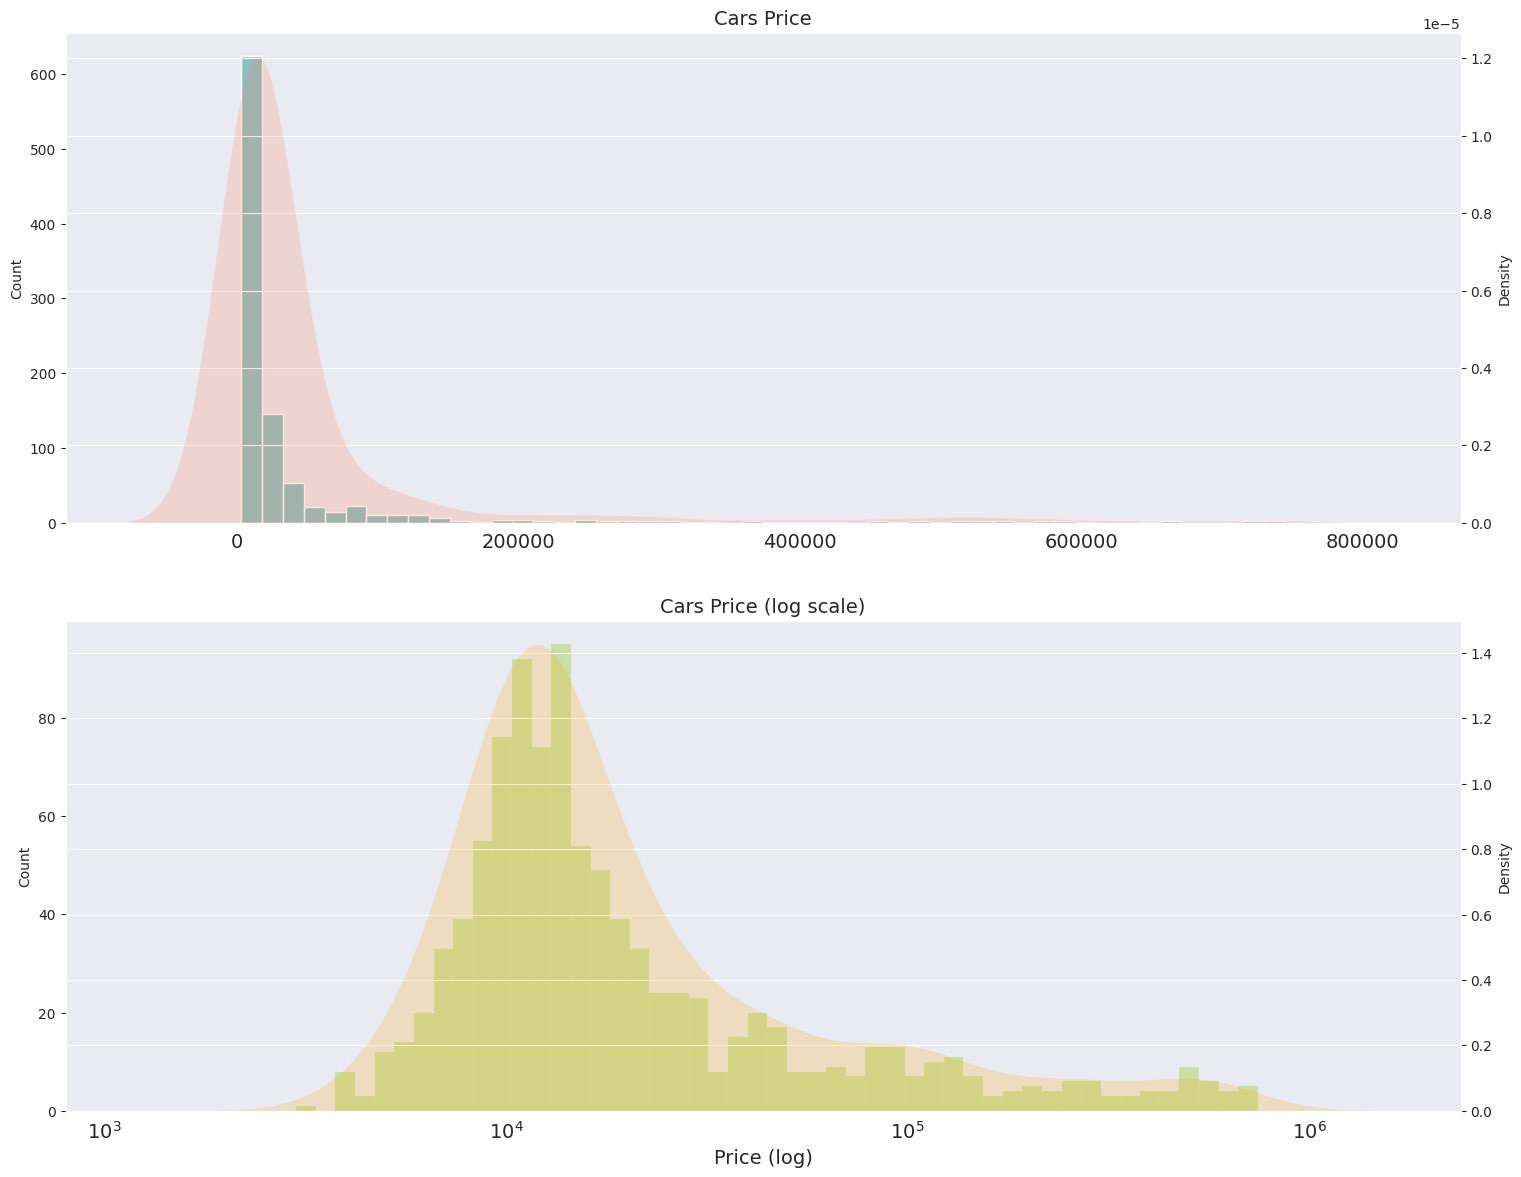

In [34]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(18, 14))

sns.histplot(data=df, x='price', bins=50, alpha=.4, color='teal', ax=ax1)
ax12 = ax1.twinx()
sns.kdeplot(data=df, x='price', alpha=.2, fill=True, color="coral", ax=ax12, linewidth=0)
ax12.grid()
ax1.set_title('Cars Price', fontsize=14)
ax1.set_xlabel('')

logbins = np.logspace(np.log10(3000), np.log10(744944.578), 50)
sns.histplot(data=df, x='price', bins=logbins, alpha=.4, color='yellowgreen', ax=ax2)
ax2.set_title('Cars Price (log scale)', fontsize=14)
ax2.set_xscale('log')
ax22 = ax2.twinx()
ax22.grid()

sns.kdeplot(data=df, x='price', alpha=.2, fill=True, color="orange", ax=ax22, log_scale=True, linewidth=0)
ax2.set_xlabel('Price (log)', fontsize=14)
ax22.set_xticks((800, 1000, 10000, 100000, 1000000))
ax2.xaxis.set_tick_params(labelsize=14)
ax1.xaxis.set_tick_params(labelsize=14)

plt.show()

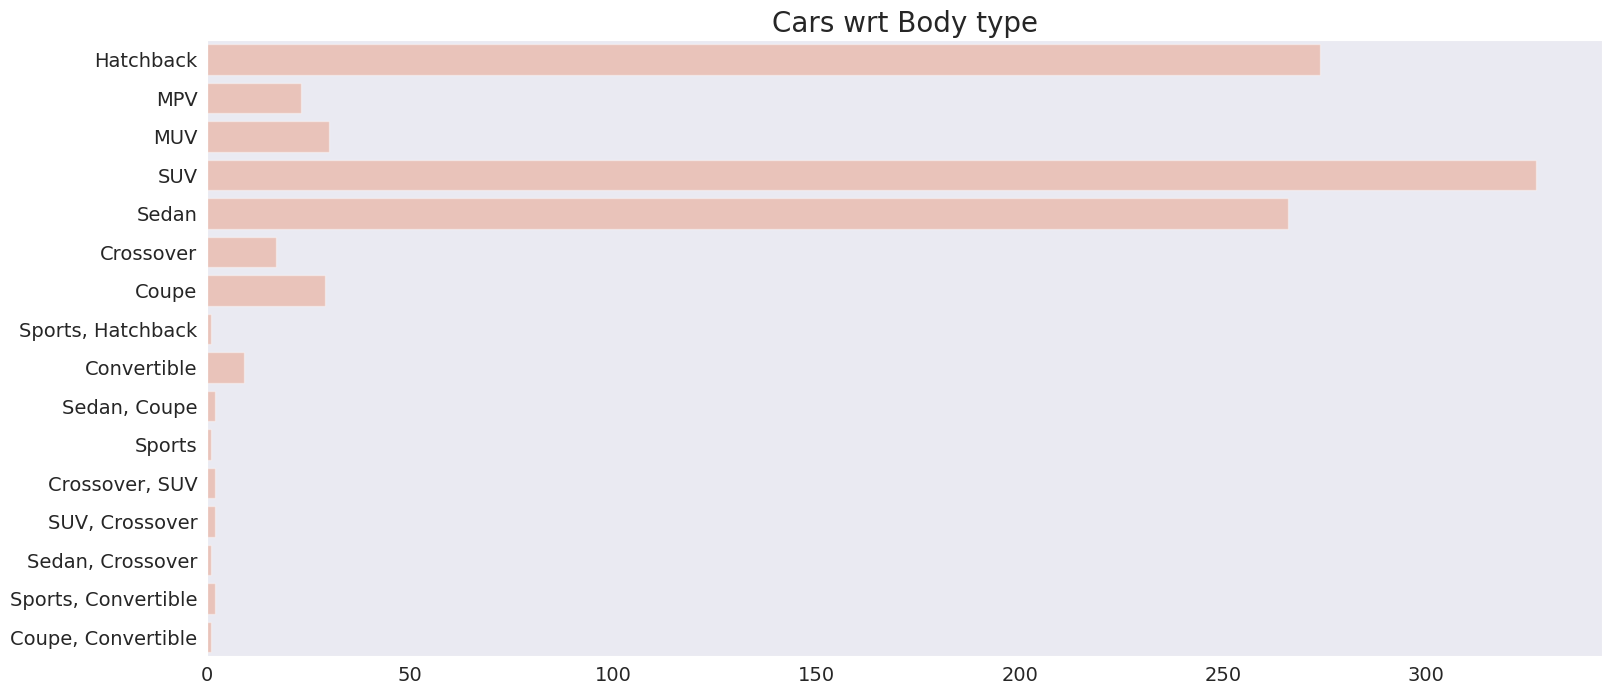

In [35]:
plt.figure(figsize=(18, 8))

sns.countplot(data=df, y='body_type', alpha=.4, color='coral')
plt.title('Cars wrt Body type', fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('')
plt.ylabel('')
plt.show()


<ipython-input-38-8d792fae3c0a>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




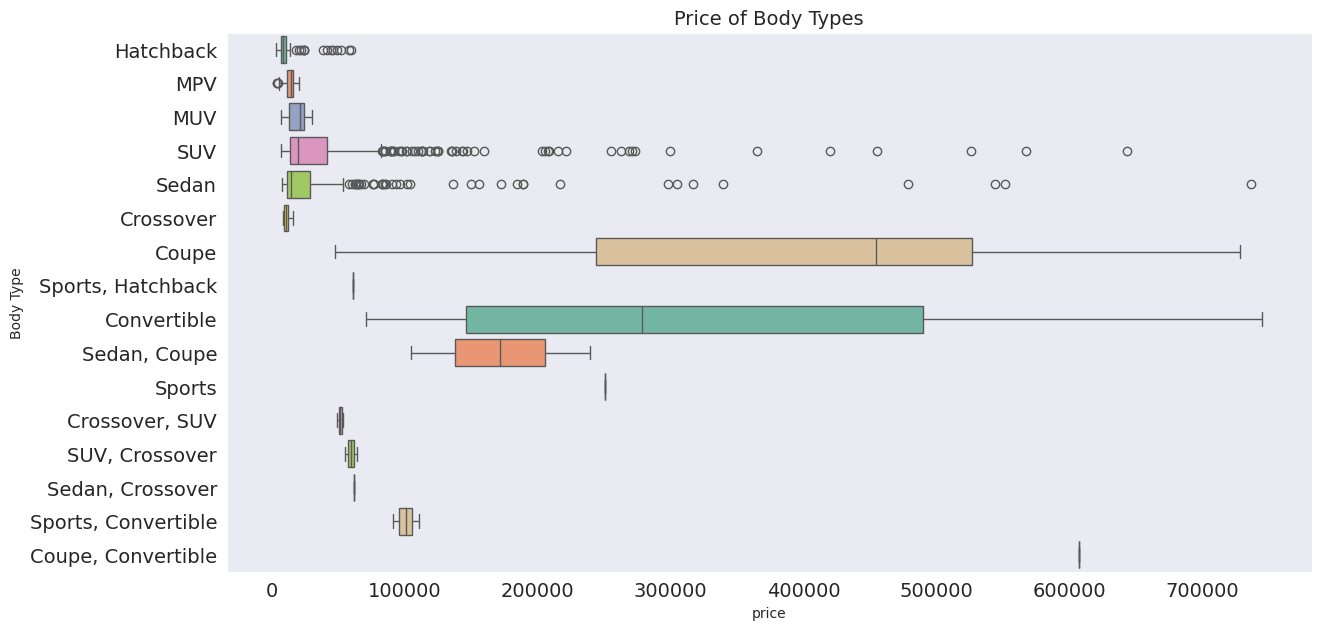

In [38]:
plt.figure(figsize=(14, 7))
sns.boxplot(data=df, x='price', y='body_type', palette='Set2')
plt.title('Price of Body Types', fontsize=14)
plt.ylabel('Body Type')
plt.yticks(fontsize=14)
plt.xticks([i for i in range(0, 800000, 100000)], fontsize=14)
plt.show()


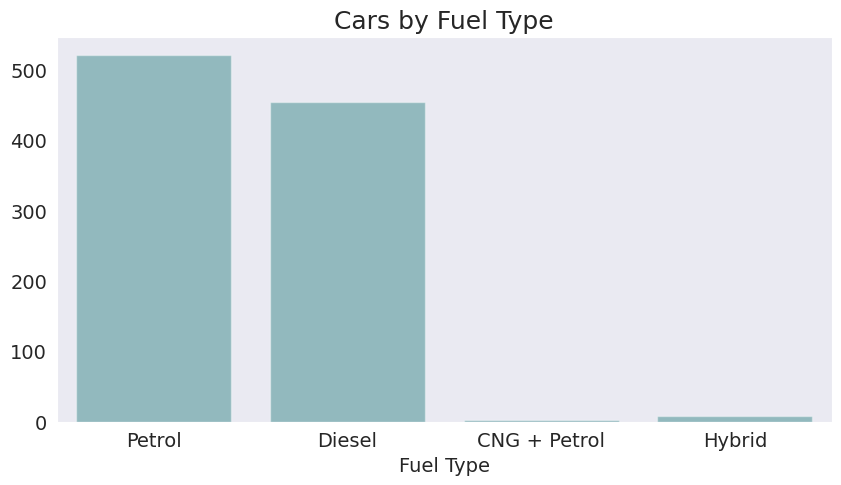

In [42]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='fuel_type', alpha=.4, color='teal')
plt.title('Cars by Fuel Type', fontsize=18)
plt.xlabel('Fuel Type', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel("");
plt.show()


Text(0.5, 1.0, 'Relation among Power & Price')

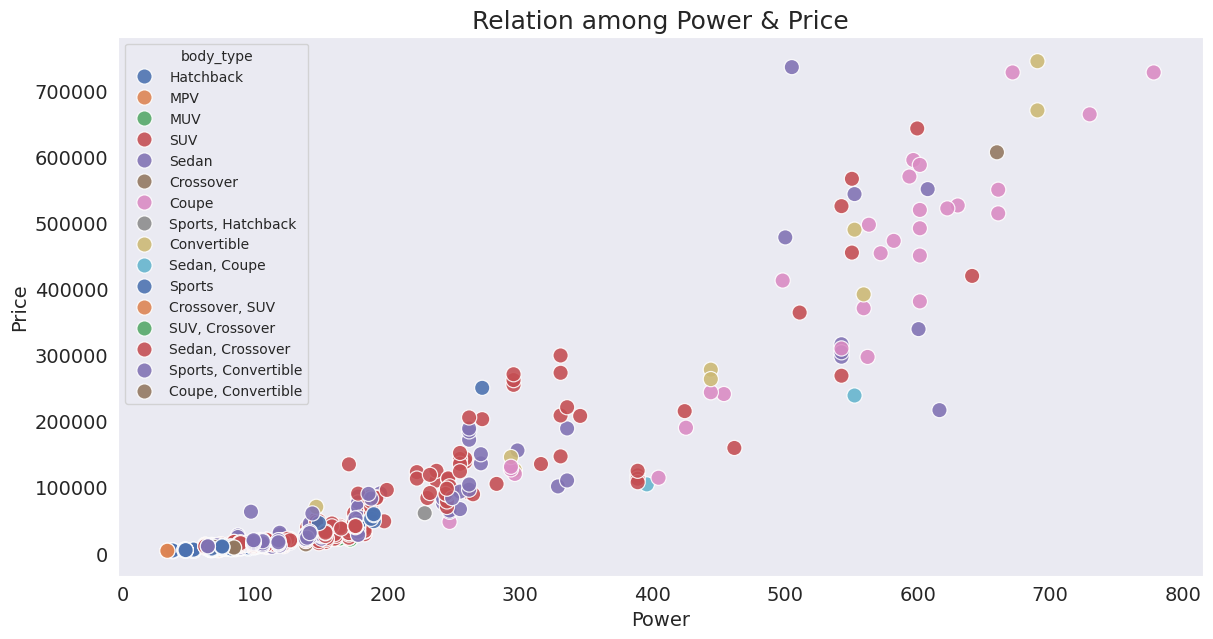

In [44]:
plt.figure(figsize=(14,7))
sns.scatterplot(data=df, x='power', y='price',hue='body_type',palette='deep',alpha=.89, s=120 );
plt.xticks(fontsize=14);
plt.yticks(fontsize=14)
plt.xlabel('Power',fontsize=14)
plt.ylabel('Price',fontsize=14)
plt.title('Relation among Power & Price',fontsize=18)



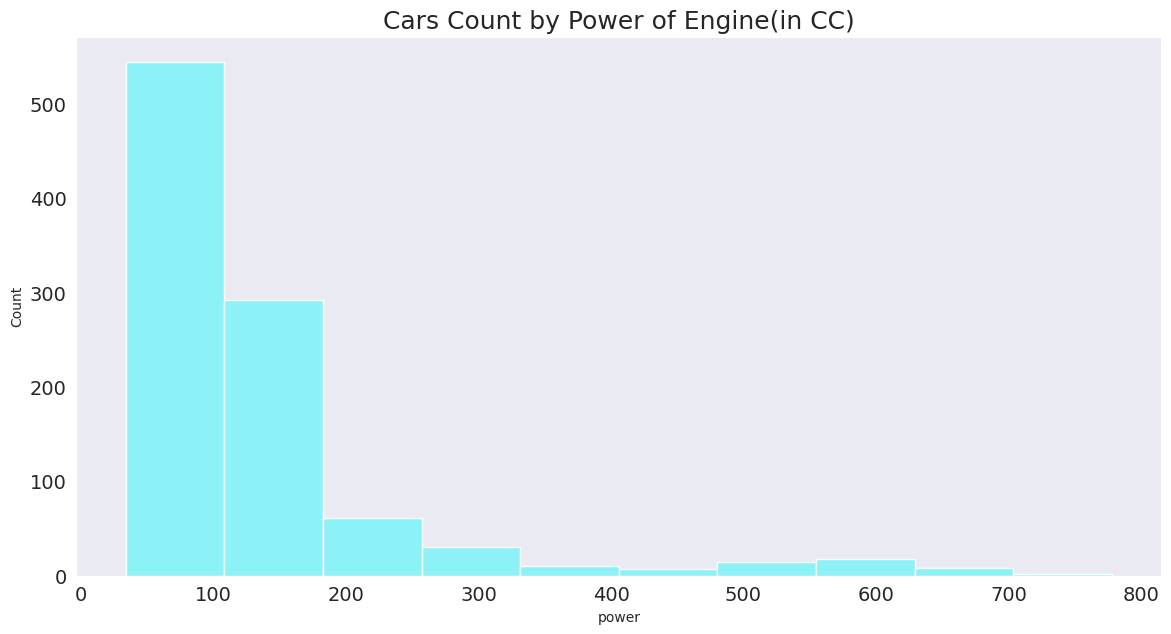

In [45]:
plt.figure(figsize=(14, 7))
sns.histplot(data=df, x='power', alpha=.4, color='aqua', bins=10)
plt.title('Cars Count by Power of Engine(in CC)', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()



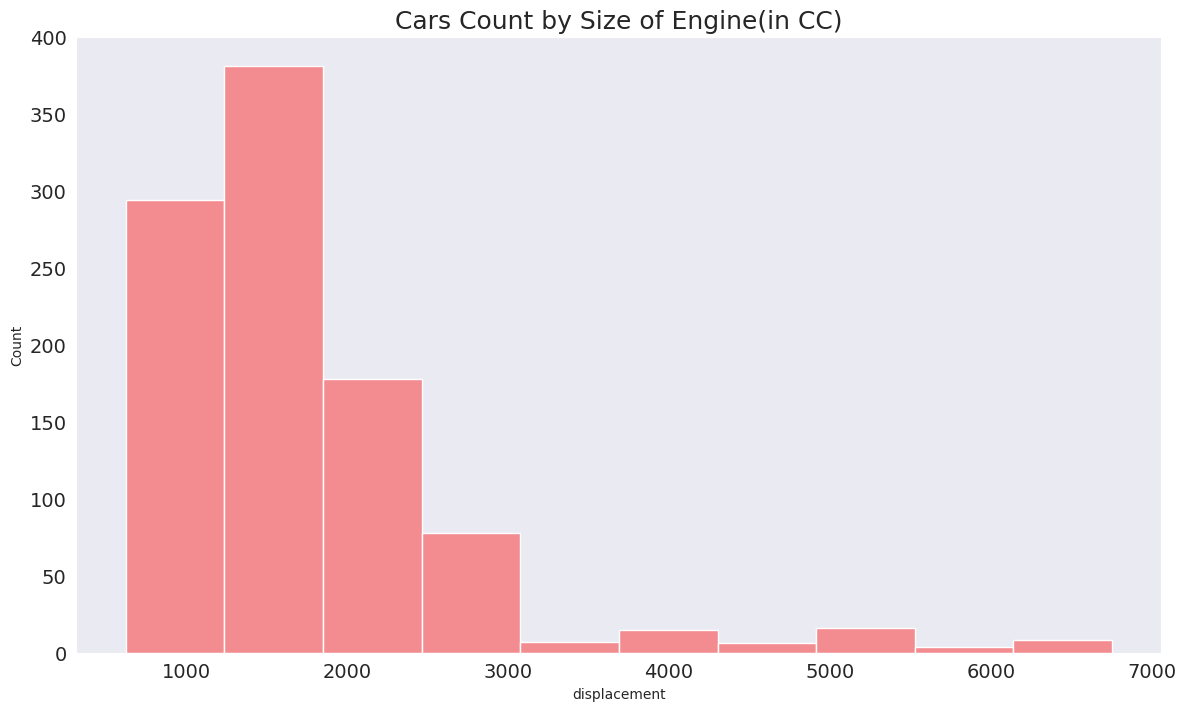

In [48]:
plt.figure(figsize=(14, 8))
sns.histplot(data=df, x='displacement', alpha=.4, color='red', bins=10)
plt.title('Cars Count by Size of Engine(in CC)', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()


<ipython-input-50-bc724267d143>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



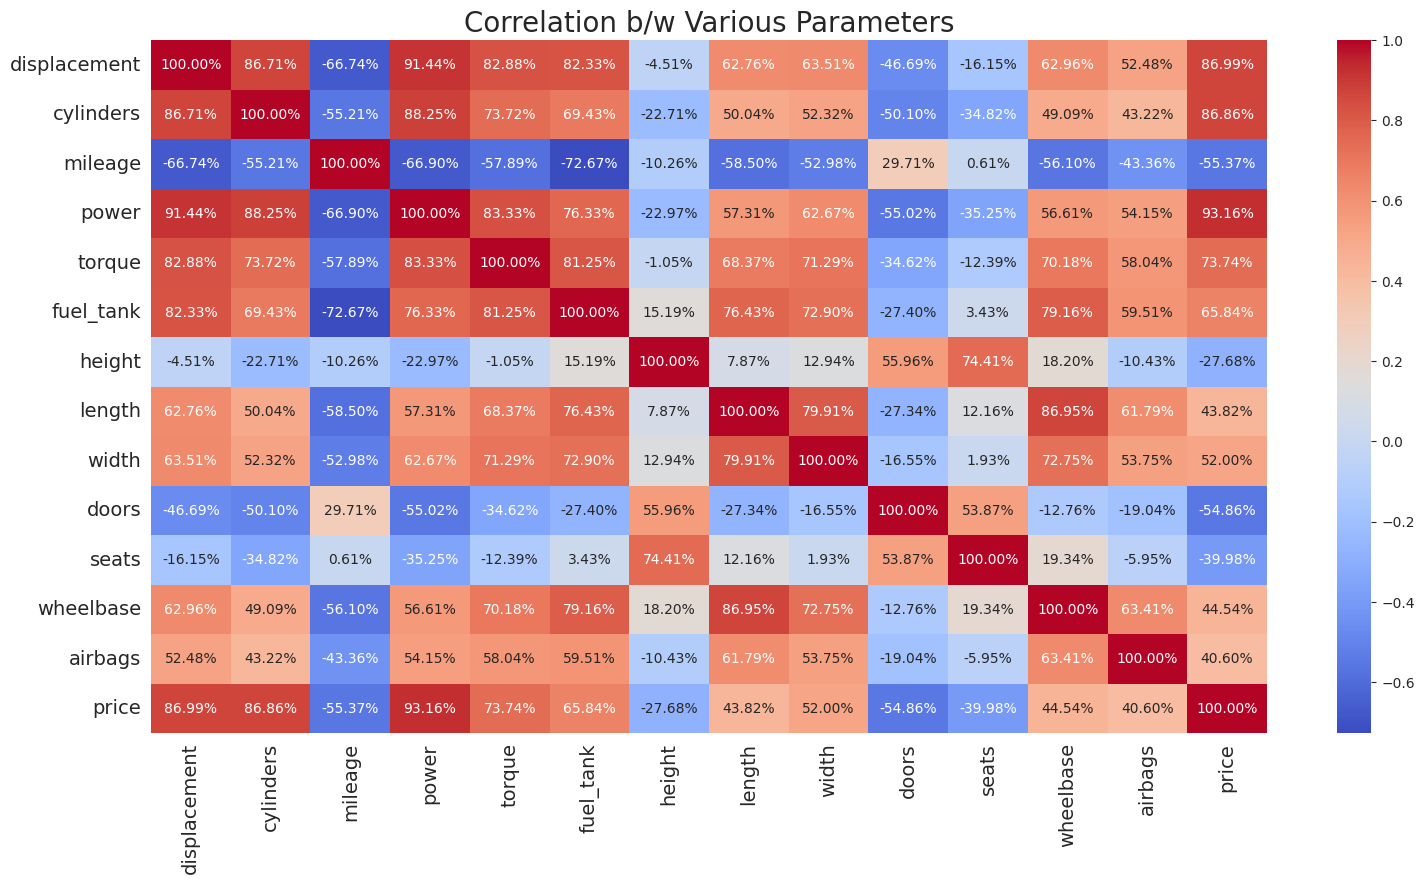

In [50]:
plt.figure(figsize=(18, 9))
sns.heatmap(df.corr(), annot=True, fmt='.2%', cmap='coolwarm')
plt.title('Correlation b/w Various Parameters', fontsize=20)
plt.xticks(fontsize=14, rotation=90)
plt.yticks(fontsize=14)
plt.show()


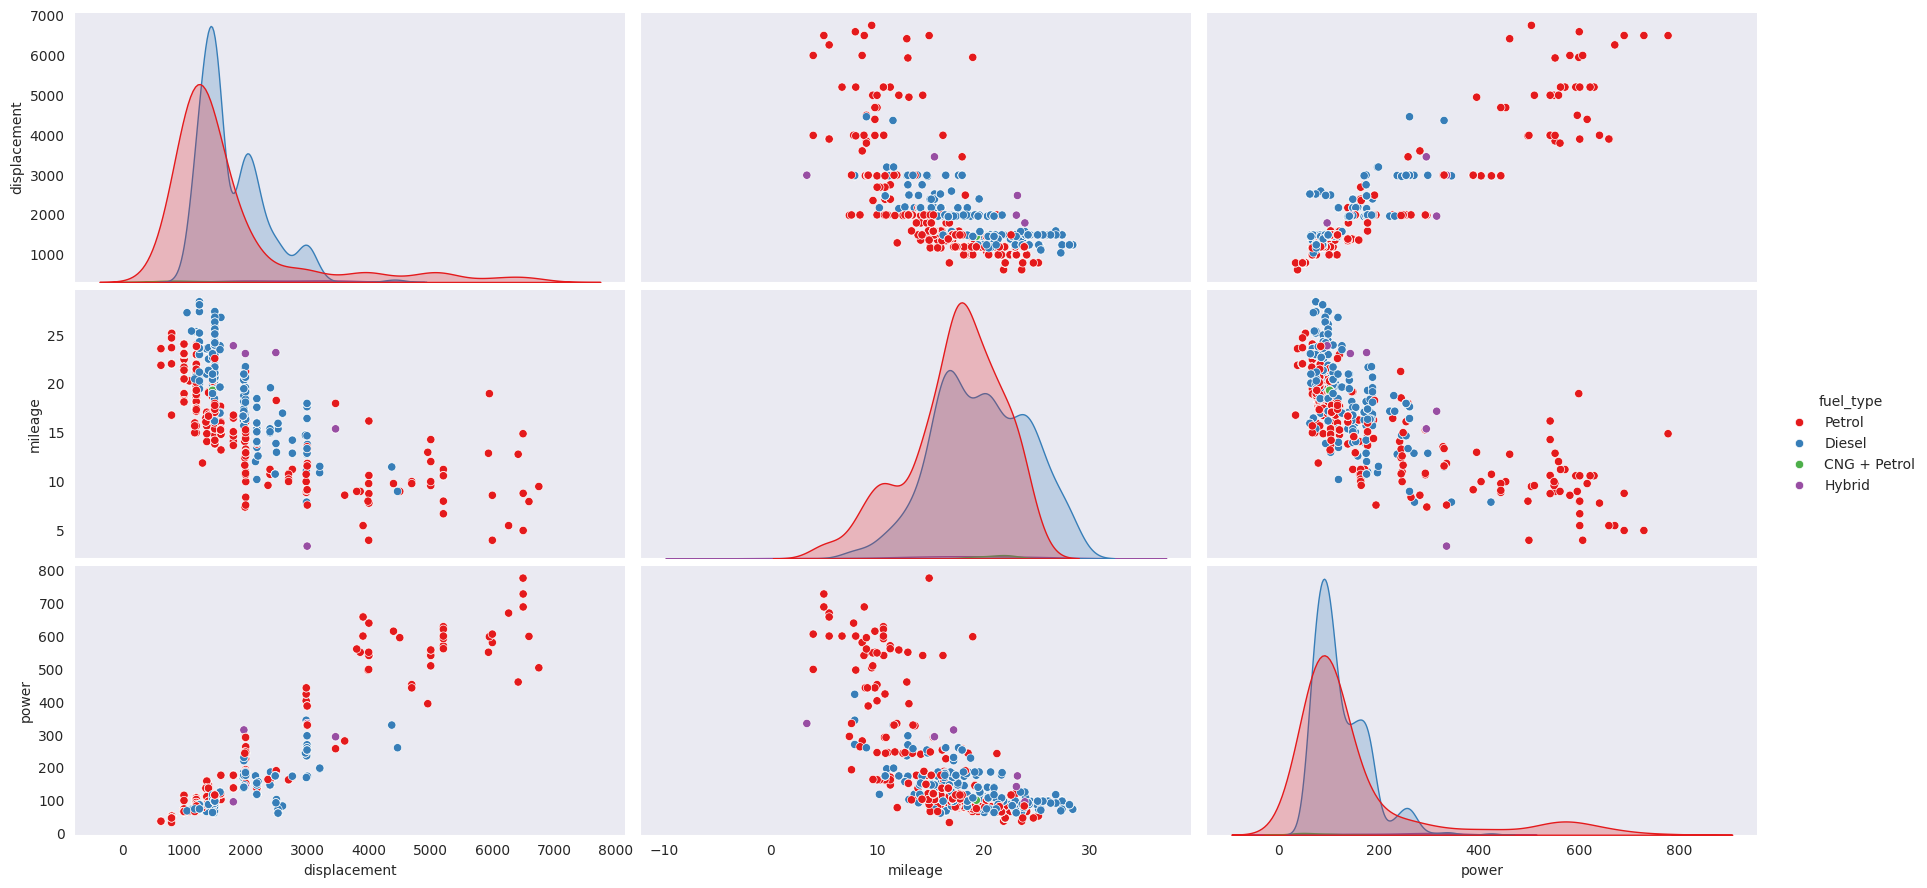

In [51]:
sns.pairplot(df, vars=['displacement', 'mileage', 'power'], hue='fuel_type',
             palette=sns.color_palette('Set1', n_colors=4), diag_kind='kde', height=3, aspect=2);